In [1]:
import ownership_curve as oc

In [2]:
own_df = oc.UpdateOwnershipDB(False)

C:\Users\rentz\OneDrive\Documents\GitHub\stat-scraping\ownership_curve.py:54: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df = df.groupby(['Player', 'PlayerId'], as_index = False).max()


In [4]:
last_week  = '20230331' #oc.last_week #
last_day_of_season = '20231001'
own_df['Delta'] = own_df['Own.{0}'.format(last_day_of_season)] - own_df['Own.{0}'.format(last_week)] #own_df['Own.{0}'.format(oc.last_week)]
own_df_sort = own_df.sort_values(by = ['Delta'])
highest_climbers = list(own_df_sort[-10:]['Player'])
biggest_fallers = list(own_df_sort[:10]['Player'])

In [5]:
print(highest_climbers)

['Lane Thomas ', 'Isaac Paredes ', 'Zach Eflin ', 'Jonah Heim ', 'Bryce Elder ', 'Mitch Keller ', 'Elly De La Cruz ', 'Justin Steele ', 'Kyle Bradish ', 'Spencer Steer ']


In [6]:
print(biggest_fallers)

['Jacob deGrom ', 'Nolan Arenado ', 'Shane McClanahan ', 'Emmanuel Clase ', 'Alek Manoah ', 'Julio Urias ', 'Yu Darvish ', 'Mike Trout ', 'Max Scherzer ', 'Sandy Alcantara ']


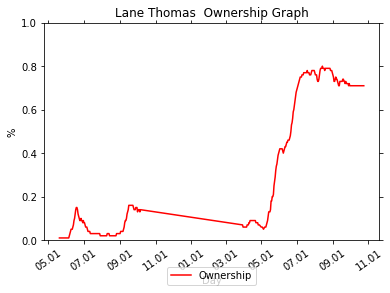

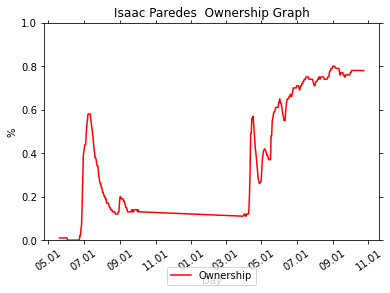

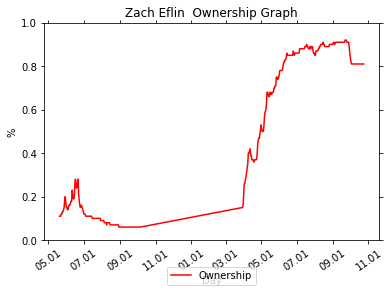

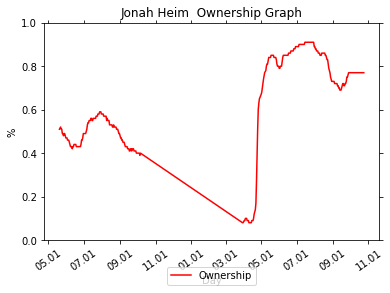

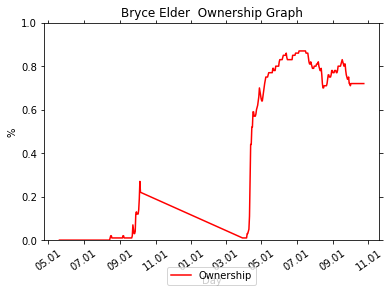

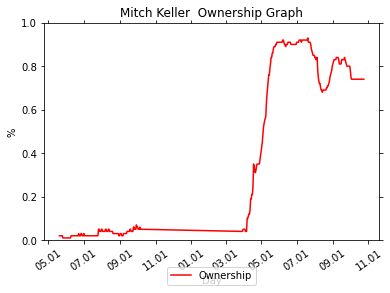

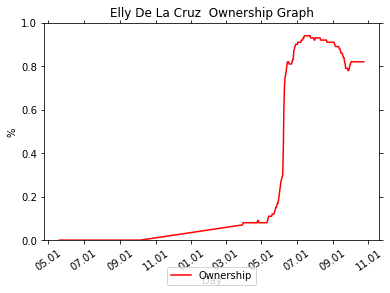

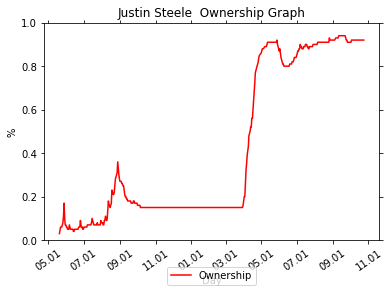

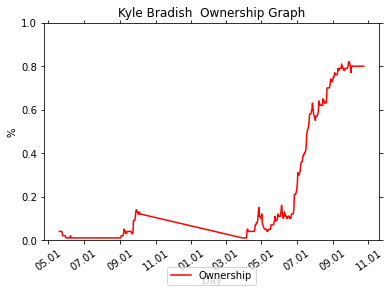

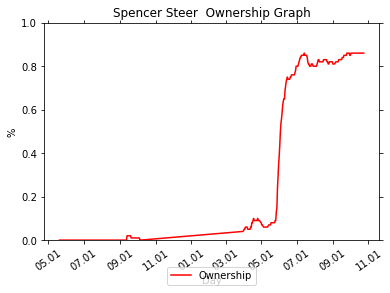

In [7]:
graphs = []
for player in highest_climbers:
     oc.GraphPlayer(own_df, player)
     new_graph = 'graphs/{}.png'.format(player)
     oc.plt.savefig(new_graph)
     im1 = oc.Image.open(new_graph)
     graphs.append(im1)
    
oc.get_concat_h(graphs).save('graphs/highest_climbers.jpg')

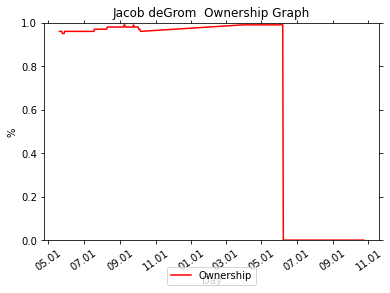

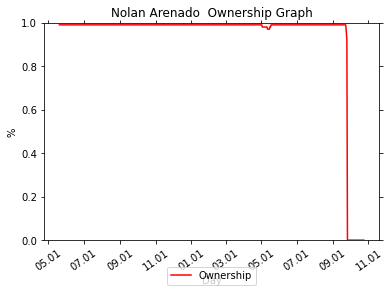

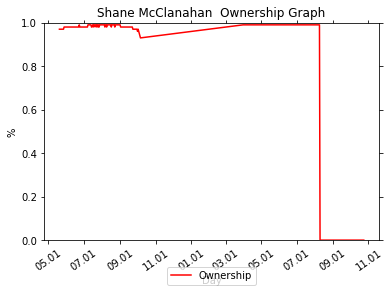

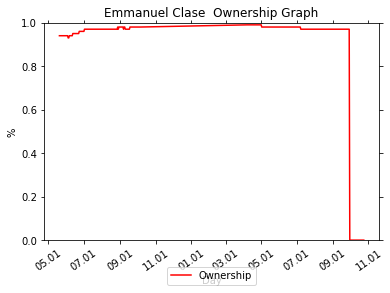

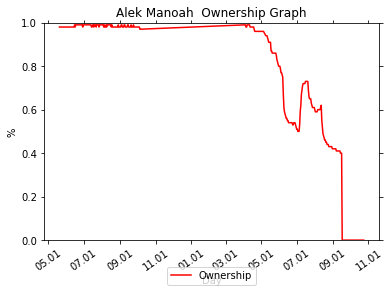

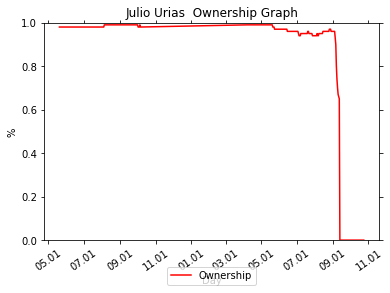

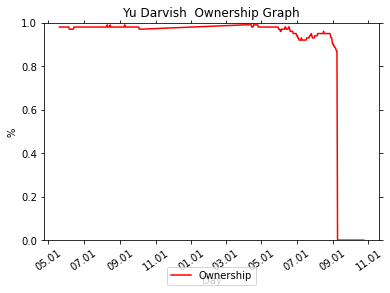

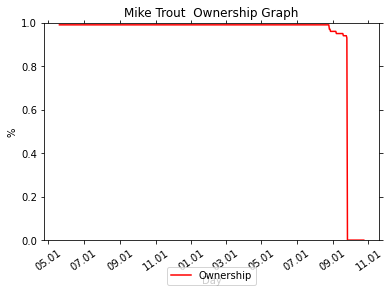

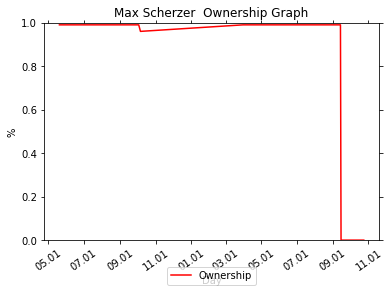

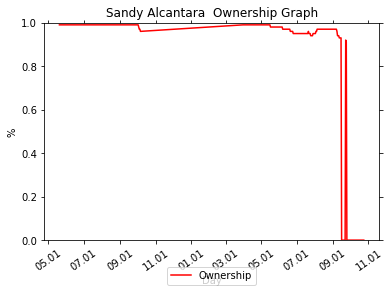

In [8]:
graphs = []
for player in biggest_fallers:
     oc.GraphPlayer(own_df, player)
     new_graph = 'graphs/{}.png'.format(player)
     oc.plt.savefig(new_graph)
     im1 = oc.Image.open(new_graph)
     graphs.append(im1)
    
oc.get_concat_h(graphs).save('graphs/highest_climbers.jpg')

In [11]:
data_file = "data/fp_proj_{0}_{1}.csv"
hit_stats = oc.stat_scraping.get_fantasy_pros_stats(player_type = 'hitters')
dfHit = oc.pd.read_csv(data_file.format('hit', last_day_of_season))   
dfHit_pre = oc.pd.read_csv(data_file.format('hit', last_week)) 

dfHit = oc.lim_hit_scope(dfHit)
hit_stats = oc.lim_hit_scope(hit_stats)
hit_stats['PlayerId'] = hit_stats['PlayerId'].astype(int)
dfHit_pre = oc.lim_hit_scope(dfHit_pre)

dfHit = oc.pd.concat([dfHit, hit_stats])
dfHit = dfHit.groupby(['Player', 'PlayerId'], as_index = False).sum()
dfHit = dfHit.merge(dfHit_pre, how= 'left', on = ['Player', 'PlayerId'])
dfHit = dfHit.loc[dfHit['Rost_y']==dfHit['Rost_y']]

interesting_plus = []
for i in ['R+RBI_', 'HR+SB_', 'H_']:
    dfHit[i+'Delta'] = dfHit[i+'x'] - dfHit[i+'y']
    dfHit = dfHit.sort_values(by = [i+'Delta'])
    highest_climbers = list(dfHit[-5:]['Player'])
    interesting_plus.extend(highest_climbers)

interesting_plus = list(set(interesting_plus))
print(interesting_plus)

['Esteury Ruiz ', 'Brent Rooker ', 'CJ Abrams ', 'Ronald Acuna Jr. ', 'Nolan Jones ', 'Willi Castro ', 'Corbin Carroll ', 'Maikel Garcia ', "Ryan O'Hearn ", 'Mike Tauchman ', 'Jake Burger ']


Esteury Ruiz , Brent Rooker , CJ Abrams , Ronald Acuna Jr. , Nolan Jones , Willi Castro , Corbin Carroll , Maikel Garcia , Ryan O'Hearn , Mike Tauchman , Jake Burger , 

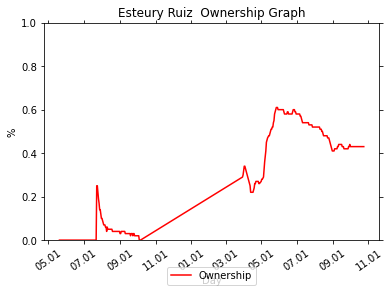

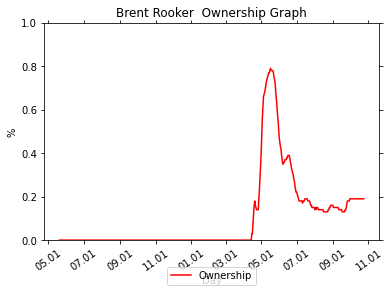

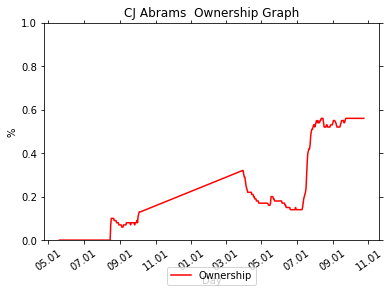

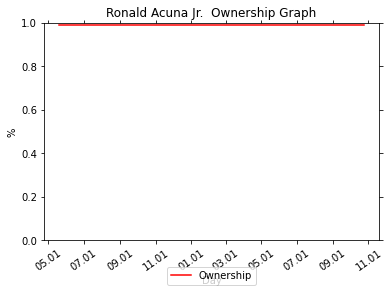

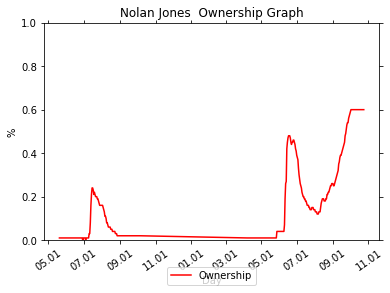

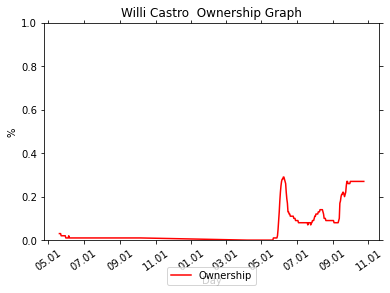

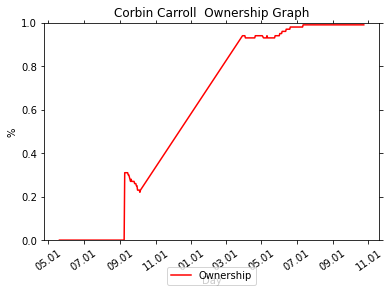

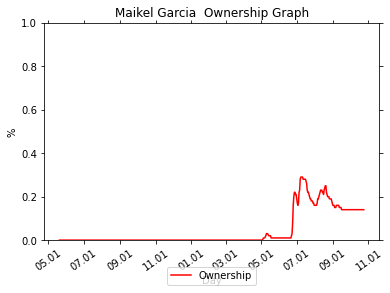

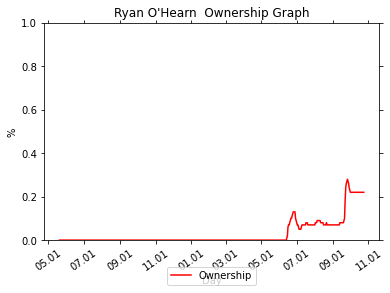

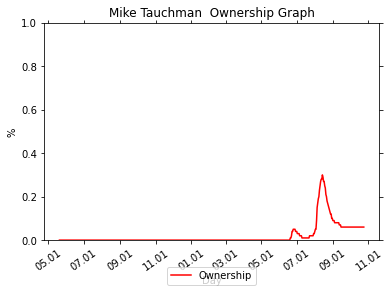

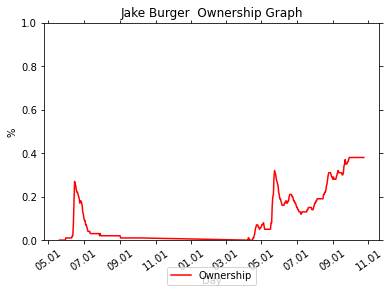

In [12]:
for player in interesting_plus:
     oc.GraphPlayer(own_df, player)
     print(player, end = ", ")

In [14]:
data_file = "data/fp_proj_{0}_{1}.csv"
pit_stats = oc.stat_scraping.get_fantasy_pros_stats(player_type = 'pitchers')
dfPit = oc.pd.read_csv(data_file.format('pit', last_day_of_season))   
dfPit_pre = oc.pd.read_csv(data_file.format('pit', last_week)) 

dfPit = oc.lim_pit_scope(dfPit)
pit_stats = oc.lim_pit_scope(pit_stats)
pit_stats['PlayerId'] = pit_stats['PlayerId'].astype(int)
dfPit_pre = oc.lim_pit_scope(dfPit_pre)

dfPit = oc.pd.concat([dfPit, pit_stats])
dfPit = dfPit.groupby(['Player', 'PlayerId'], as_index = False).sum()
dfPit = dfPit.merge(dfPit_pre, how= 'left', on = ['Player', 'PlayerId'])
dfPit = dfPit.loc[dfPit['Rost_y']==dfPit['Rost_y']]

interesting_plus_pit = []
for i in ['W+SV_', 'IP_', 'K_']:
    dfPit[i+'Delta'] = dfPit[i+'x'] - dfPit[i+'y']
    dfPit = dfPit.sort_values(by = [i+'Delta'])
    highest_climbers_pit = list(dfPit[-5:]['Player'])
    interesting_plus_pit.extend(highest_climbers_pit)

interesting_plus_pit = list(set(interesting_plus_pit))
print(interesting_plus_pit)

['J.P. France ', 'Alexis Diaz ', 'Griffin Canning ', 'Johan Oviedo ', 'Carlos Estevez ', 'Will Smith ', 'Dane Dunning ', 'Taj Bradley ', 'Andrew Abbott ', 'Adbert Alzolay ', 'Bryce Elder ', 'Craig Kimbrel ']


J.P. France , Alexis Diaz , Griffin Canning , Johan Oviedo , Carlos Estevez , Will Smith , Dane Dunning , Taj Bradley , Andrew Abbott , Adbert Alzolay , Bryce Elder , Craig Kimbrel , 

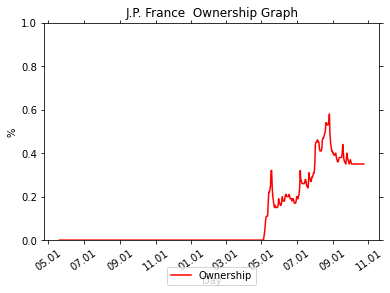

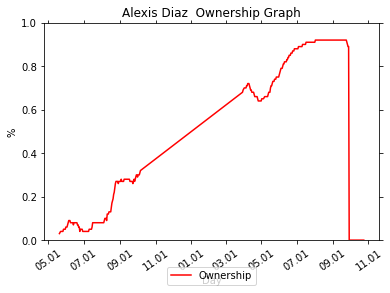

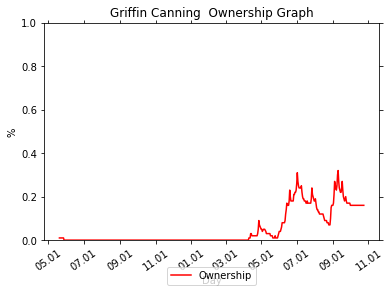

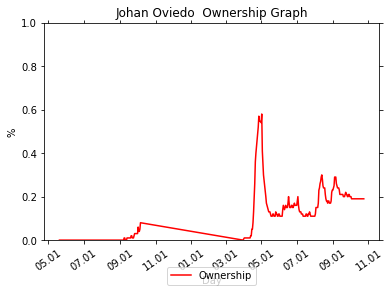

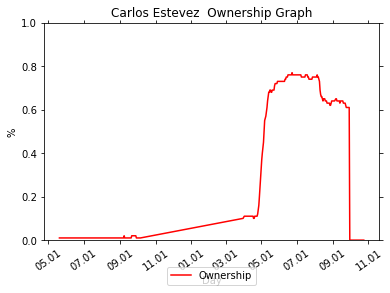

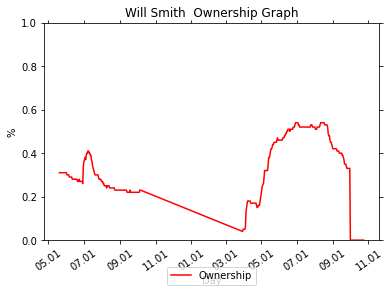

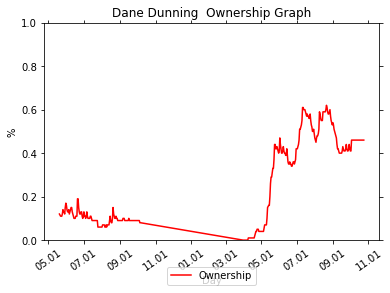

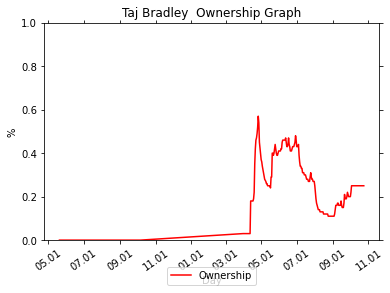

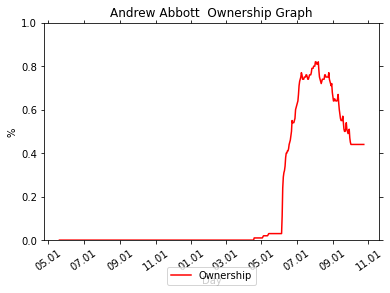

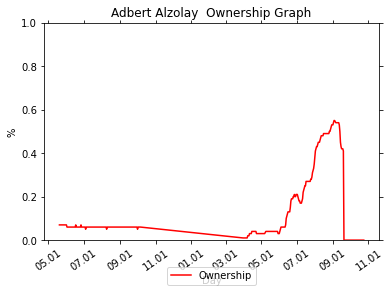

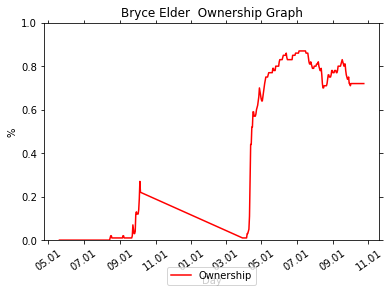

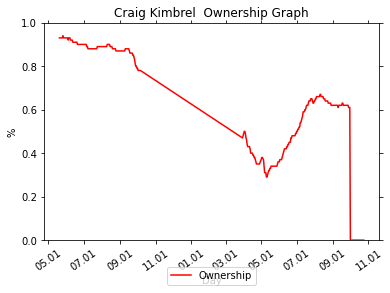

In [15]:
for player in interesting_plus_pit:
     oc.GraphPlayer(own_df, player)
     print(player, end = ", ")